In [1]:
import warnings
warnings.filterwarnings('ignore')

# Markdown
* a document formatting approach that makes writing documentation (or anything) pretty easy
* can do markdown outside of jupyter
    * filename `somefile.md`
* you can make code cells

```python
def example_function(x):
    return f'I am {x}'
```



# Machine Learning Issues

![xkcd_curve_fitting.png](images/xkcd_curve_fitting.png)

# Let's consider a scatterplot
* at differing levels of complexity
    * complexity can refer to number of features, width of a matrix, etc
    * complexity here just means order of a polynomial
    
$$
f(x) = ax^4 + bx^3 + cx^2 + dx + C
$$

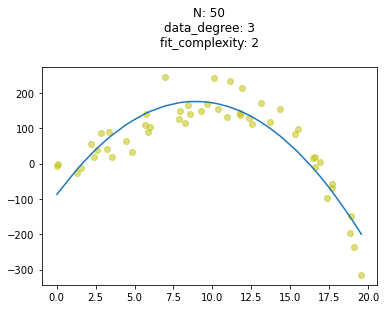

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scatter_fit(num_samps=50, fit_complexity=1, degree=1):
    N = num_samps
    
    np.random.seed(seed=23)
    
    # gen rand x vals
    x = np.random.rand(N)*20
    
    
    # define polynomial
    if degree == 1:
        y = 5*x + 3
    elif degree == 2:
        y = 3*x**2 + 5*x + 3
    elif degree == 3:
        y = -0.2*x**3 + 3*x**2 + 5*x + 3
    elif degree == 4:
        y = 0.006*x**4 + -0.2*x**3 + 3*x**2 + 5*x + 3


    # help us draw a fit line
    fit = np.polyfit(x, y, 1)
    fit_fn = np.poly1d(fit)
    
    
    # get scatter range
    y_val_range = np.ptp(y)
    
    
    # add guassian/normal noise
    y = [pt + np.random.normal(loc=0.0, scale=((1./10.)*y_val_range)) 
         for pt in y]

    # line that we draw
    fit_complexity_ = fit_complexity
    regr = np.poly1d(np.polyfit(x, y, fit_complexity_))(np.unique(x))

    
    # plot
    plt.title('N: {}\n'.format(N) + \
              'data_degree: {}\n'.format(degree) + \
              'fit_complexity: {}\n'.format(fit_complexity))
    
    plt.scatter(x, y, c='y', alpha=0.5)
    plt.plot(np.unique(x), regr)
    
    plt.show()
    
plot_scatter_fit(num_samps=50, fit_complexity=2, degree=3)

### Occam's Razor
* does a simpler model effectively explain the data/discover a signal in relation to a more complex model?
    * choose the simpler model that gets the job done effectively

<br><br>

# Apply CrossVal to a Classification Problem
* using the Iris Dataset
* Apply KNN, simple/naive algorithm


# KNN (K-Nearest Neighbors)
* KNN is supervised
    * X and y data
* KNN is non-parametric
    * potential to interpret a non-linear data signal
* KNN training data IS ESSENTIALLY the fit model
    * must store data/model in memory
    * prediction is computationally expensive
* KNN prediction is a majority vote betw the k most similar instances on a yet unseen data point

## Basic Algorithm for KNN
```
Given a structured data set:
    set value of k
    for each data point:
        find k most similar data points
        check class of each of k similar data points
        assume current data point is of the majority class checked
```

## Distance/Similarity metrics
* euclidean distance
* manhattan distance
* cosine similarity
* hamming distance/similarity

# General ML Workflow

## 1. Import/Clean/Reshape Data
* EDA (Exporatory Data Analysis)

In [26]:
# load libraries
import pandas as pd

# define colums
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# load training data
df = pd.read_csv('data/iris.data.txt', header=None, names=names)

columns = df.columns



df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
# what are the class names?
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
len(df)

150

### Plot the data

In [30]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['class']]



In [ ]:
from sklearn.preprocess import LabelEncoder

def plot_features(X_df, y_df, columns):
    